# START #

***Importing the libraires***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***Importing the dataset***

In [2]:
dataset = pd.read_csv('bmi.csv')

In [3]:
dataset.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
dataset.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [9]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

*Making the Gender column be a numerical data because of being a categorical data*

In [11]:
gender = LabelEncoder()
dataset['Gender'] = gender.fit_transform(dataset['Gender'])

In [12]:
dataset.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


***Replacing the values of Index column to string***

In [13]:
bins=(-1,0,1,2,3,4,5)
shape = ['thin', 'plump', 'fat', 'medium', 'slim', 'muscular']
dataset['Index'] = pd.cut(dataset['Index'], bins=bins, labels=shape)

In [14]:
dataset.head()

,Gender,Height,Weight,Index
0,1,174,96,slim
1,1,189,87,fat
2,0,185,110,slim
3,0,195,104,medium
4,1,149,61,medium


In [19]:
dataset['Index'].value_counts()

muscular    198
slim        130
fat          69
medium       68
plump        22
thin         13
Name: Index, dtype: int64

In [20]:
dataset['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

# Making the countplot of the Gender column #

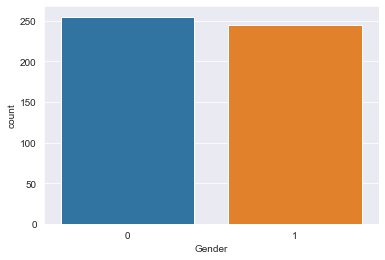

In [23]:
sns.set_style('darkgrid')
sns.countplot(dataset['Gender'])

# Same with Index column #

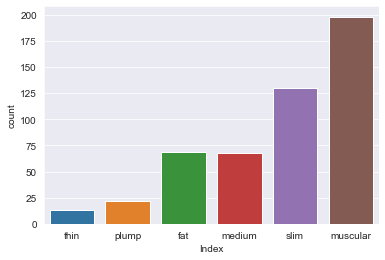

In [24]:
sns.set_style('darkgrid')
sns.countplot(dataset['Index'])

# Creating the relplot of the dataset

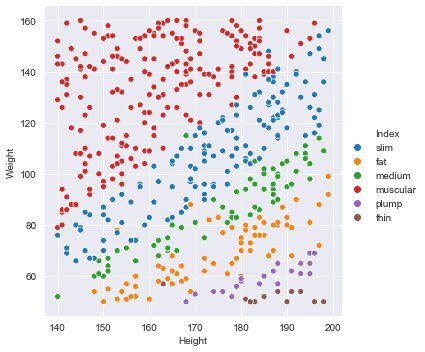

In [25]:
sns.relplot(data=dataset, x='Height', y='Weight', hue='Index')

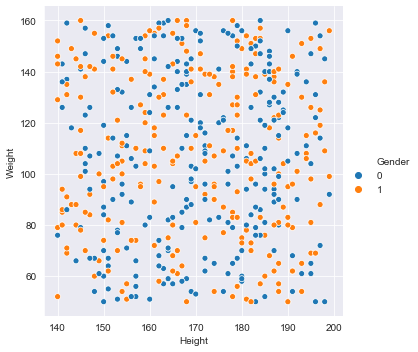

In [33]:
sns.relplot(data=dataset, x='Height', y='Weight', hue='Gender')

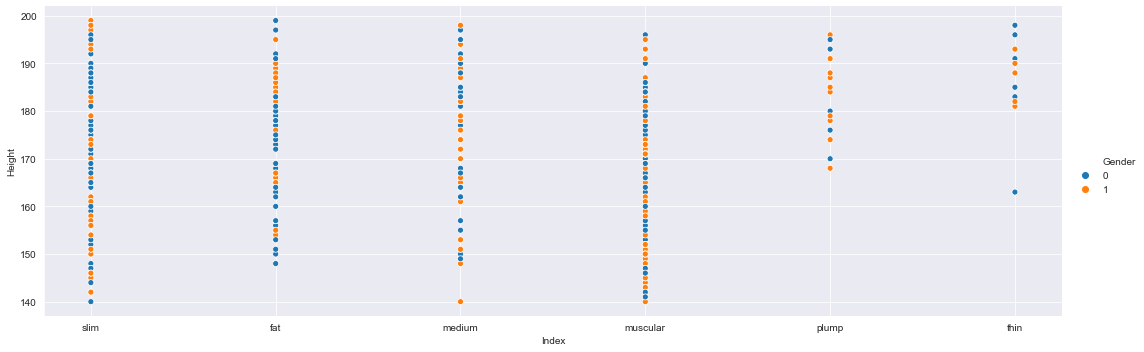

In [40]:
sns.relplot(data=dataset, x='Index', y='Height', hue='Gender', height=5, aspect=3)

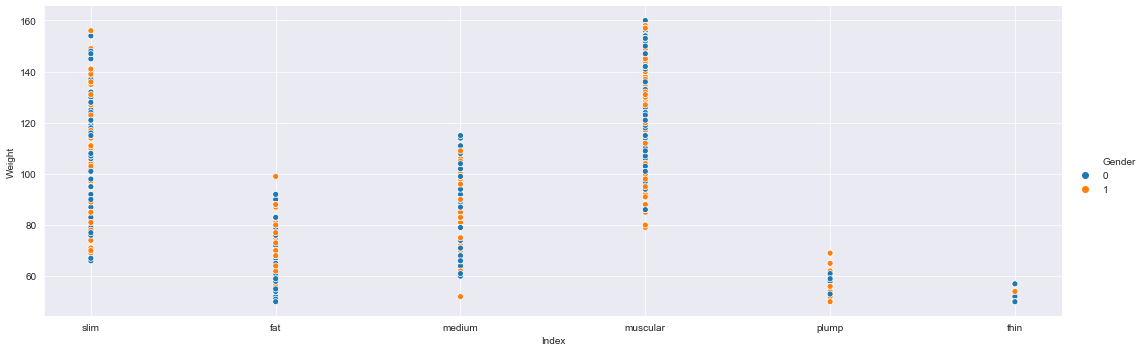

In [41]:
sns.relplot(data=dataset, x='Index', y='Weight', hue='Gender', height=5, aspect=3)

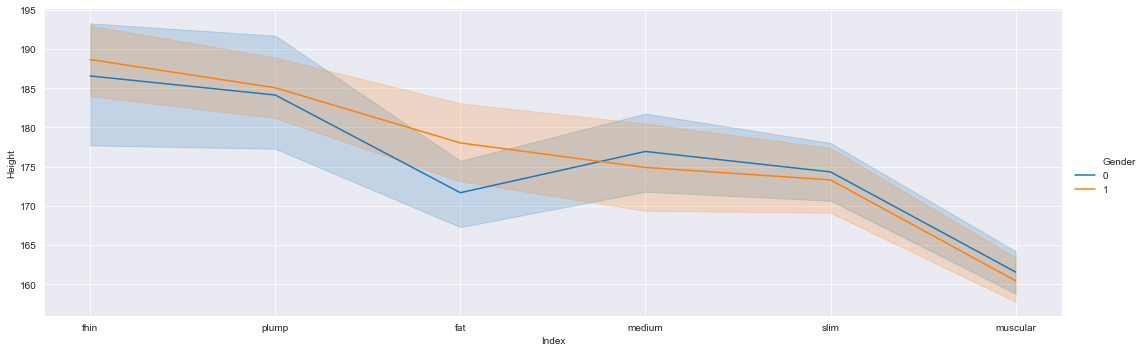

In [38]:
sns.relplot(data=dataset, x='Index', y='Height', hue='Gender', kind='line', height=5, aspect=3)

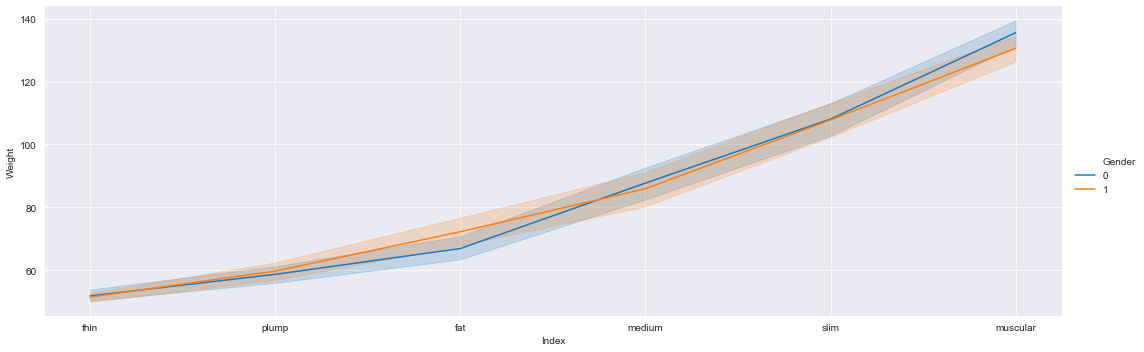

In [39]:
sns.relplot(data=dataset, x='Index', y='Weight', hue='Gender', kind='line', height=5, aspect=3)

***Finding the tallest person of the dataset***

In [27]:
max(dataset['Height'])

199

***Finding the heaviest person of the dataset***

In [28]:
max(dataset['Weight'])

160

***How many persons are there in dataset whose height is 199***

In [31]:
len(dataset[dataset['Height'] == 199])

3

***How many persons are there in dataset whose weight is 160***

In [32]:
len(dataset[dataset['Weight'] == 160])

6

# Splitting the dataset #

In [42]:
X = dataset.drop('Index', axis=1)
y = dataset['Index']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling #

In [48]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Implementing SVM #

In [52]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Making Prediction #

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
y_pred

array(['muscular', 'muscular', 'slim', 'muscular', 'muscular', 'muscular',
       'medium', 'muscular', 'slim', 'muscular', 'fat', 'medium', 'fat',
       'muscular', 'muscular', 'medium', 'muscular', 'medium', 'muscular',
       'muscular', 'muscular', 'medium', 'medium', 'slim', 'fat', 'plump',
       'muscular', 'slim', 'slim', 'medium', 'slim', 'muscular',
       'muscular', 'muscular', 'slim', 'plump', 'muscular', 'slim',
       'muscular', 'fat', 'muscular', 'slim', 'slim', 'muscular', 'slim',
       'fat', 'muscular', 'fat', 'muscular', 'muscular', 'slim', 'slim',
       'fat', 'muscular', 'muscular', 'medium', 'slim', 'slim', 'plump',
       'muscular', 'slim', 'slim', 'slim', 'fat', 'slim', 'medium', 'fat',
       'medium', 'muscular', 'slim', 'muscular', 'muscular', 'medium',
       'slim', 'slim', 'muscular', 'muscular', 'muscular', 'muscular',
       'muscular', 'slim', 'medium', 'slim', 'muscular', 'muscular',
       'medium', 'muscular', 'muscular', 'muscular', 'slim', 'm

# Applying confusion matrix and classification report #

In [55]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\Users\Windows10sx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         fat       0.73      0.80      0.76        10
      medium       0.78      0.93      0.85        15
    muscular       0.88      0.97      0.92        36
       plump       0.60      0.75      0.67         4
        slim       0.96      0.78      0.86        32
        thin       0.00      0.00      0.00         3

    accuracy                           0.85       100
   macro avg       0.66      0.71      0.68       100
weighted avg       0.84      0.85      0.84       100

[[ 8  2  0  0  0  0]
 [ 1 14  0  0  0  0]
 [ 0  0 35  0  1  0]
 [ 1  0  0  3  0  0]
 [ 0  2  5  0 25  0]
 [ 1  0  0  2  0  0]]


***As we see from confusion matrix, our prediction has made 15 mistakes, but it is not bad, it is pretty good for our model***

# Accuracy Score #

In [56]:
print(accuracy_score(y_test, y_pred))

0.85


***I'm gonna show you a simple code that can help you comprehend the meaning of prediction here !***

In [57]:
simple_code = [[0, 195, 104]]
simple_code = sc.transform(simple_code)
prediction = classifier.predict(simple_code)

In [58]:
prediction

array(['medium'], dtype=object)

In [59]:
dataset.head()

,Gender,Height,Weight,Index
0,1,174,96,slim
1,1,189,87,fat
2,0,185,110,slim
3,0,195,104,medium
4,1,149,61,medium


***You can see in the dataset that the person whose index index on the dataset is 3 has Height 195, Weight 104. I have just used this information as dataset in simple_code and predicted, it's very awesome that prediction of our model is true, because, this person in whose index is 3 has a medium shape in real !***

# FINISH #